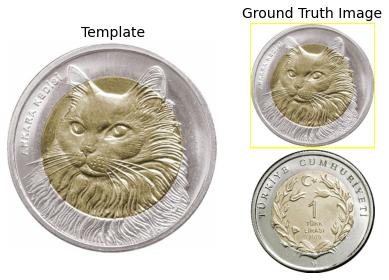

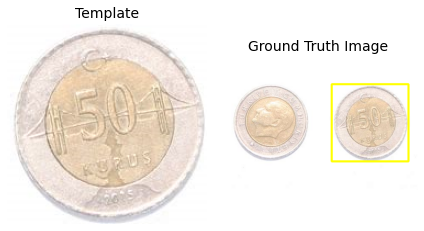

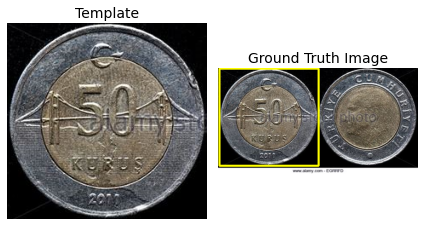

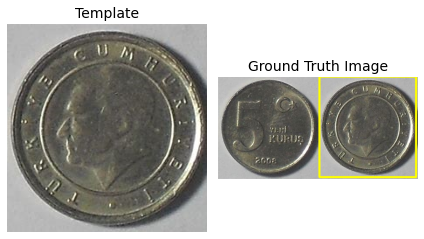

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

# read all images and return arrays
def get_images_array(path):

    images, names = [], []
    for i in path:
        if i != "part_2_dataset\\templates":
            img = cv2.imread(i)
            images.append(img)
            names.append(i[15:-3])

    return np.array(images), names

images_path = glob.glob('part_2_dataset\*')
templates_path = glob.glob('part_2_dataset\\templates\*')

part2_images, part2_names = get_images_array(images_path)
template_images, templates_names = get_images_array(templates_path)

# My Offset Detector class from scratch
class OffsetDetector:

    def __init__(self, image, template):
        self.image = image
        self.template = template

    def calculate_cross_correlation(self, image_part, template):

        product = np.mean((image_part - image_part.mean()) * (template - template.mean()))
        stds = image_part.std() * template.std()
        if stds != 0:
            product /= stds
            return product
        else:
            return 0

    def detect_offset(self, image, template):

        # I apply grayscale to make the pictures 2D
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

        cc_matrix = np.zeros((image.shape[0] - template.shape[0], image.shape[1] - template.shape[1]))
        max_match = 0
        return_coordinates = ()

        # using filter from top-left to bottom-right
        for x in range(0, image.shape[0] - template.shape[0]):
            for y in range(0, image.shape[1] - template.shape[1]):
                image_part = image[x: x + template.shape[0], y: y + template.shape[1]]
                # calculate cross correlation and append to cross-correlation matrix
                cc_matrix[x, y] = self.calculate_cross_correlation(image_part, template)
                # find the maximum match area
                if cc_matrix[x, y] > max_match:
                    max_match = cc_matrix[x, y]
                    return_coordinates = (y, x)

        # return top-left coordinates of matching area
        return return_coordinates

    def plot_offset(self):

        image = self.image
        template = self.template
        coordinates = self.detect_offset(image, template)
        height, width = template.shape[0], template.shape[1]

        fig, axes = plt.subplots(ncols=2)
        axes[0].set_title('Template', fontsize=14)
        axes[1].set_title('Ground Truth Image', fontsize=14)

        axes[0].imshow(cv2.cvtColor(self.template, cv2.COLOR_BGR2RGB))
        # draw yellow rectangle
        cv2.rectangle(image, coordinates, (coordinates[0] + width, coordinates[1] + height), (0, 255, 255), 3)
        axes[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        for ax in axes:
            ax.axis('off')

        plt.tight_layout()
        plt.show()


# run algorithm and plot offsets on the template images and segmentation maps of the corresponding input images
template_counter = 0
for temp in templates_names:
    template_image_name = temp[10:]
    image_counter = 0
    for image_name in part2_names:
        if template_image_name == image_name:
            offset = OffsetDetector(part2_images[image_counter], template_images[template_counter])
            offset.plot_offset()
        image_counter += 1
    template_counter += 1